<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<hr style="height:2px;border:none"/>

<h4 align='left'> Integrantes: </h4>
<p align='left'> Alfredo Silva Celpa 201373511-8 </p>
<p align='left'> Margarita Bugueño Pérez 201373510-k </p>
<hr style="height:2px;border:none"/>


**Temas**  
* Entrenamiento de redes *Feed-Forward* vı́a GD y variantes (SGD, mini-*batches*), *momentum*, regularización y tasa de aprendizaje adaptiva.
* Evaluación de redes *Feed-Forward* vı́a validación cruzada (cross-validation).
* Rol de capas ocultas y mayor profundidad (*Deep Learning*).
* Identificar el gradiente desvaneciente.
* Diseño y entrenamiento de Redes Convolucionales (CNNs).
 

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y discusión: 04 Abril
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea1-INF395-I-2018]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Predicción del precio de una Casa  
[2.](#segundo) *Deep Networks*  
[3.](#tercero) Convolutional Neural Network (CNN) en CIFAR.  
[4.](#cuarto) Aplicación de una red neuronal en Localización

<a id="tercero"></a>
## 3. Convolutional Neural Network (CNN) en CIFAR.

En esta sección trabajaremos con un dataset bastante conocido y utilizado por la comunidad para experimentar con reconocimiento de objetos en imágenes: *CIFAR10* [[3]](#refs). Se trata de un conjunto de 60.000 imágenes RGB de 32 × 32 pixeles que contiene 10 clases de objetos y 6000 ejemplos por clase. La versión utilizada se atribuye a A. Krizhevsky, V. Nair y G. Hinton y viene separada en 50000 ejemplos de entrenamiento y 10000 casos de prueba. El conjunto de pruebas fue obtenido seleccionando 1000 imágenes aleatorias de cada clase. Los datos restantes han sido ordenados aleatoriamente y están organizados en 5 bloques de entrenamiento (batches). Las clases son mutuamente excluyentes y corresponden a las siguientes categorı́as: gatos, perros, ranas, caballos, pájaros, ciervos, aviones, automóviles, camiones y barcos. Para esta tarea se experimentará con redes convolucionales, conocidas como CNNs ó ConvNets.  
Nota: Para esta actividad es bastante aconsejable entrenar las redes usando una GPU, ya que de otro modo los tiempos de entrenamiento son largos, por lo que recuerde instalar keras con gpu y el driver de __[cuda](https://developer.nvidia.com/cuda-downloads)__ para la tarjeta gráfica.  

Los datos asociados a esta actividad podrán ser obtenidos utilizando los siguientes comandos en la lı́nea
de comandos (sistemas UNIX)

wget http://octopus.inf.utfsm.cl/~ricky/data.tar.gz
tar -xzvf data.tar.gz
rm data.tar.gz

En la carpeta generada encontrarán 5 archivos denominados ’data batch 1’, ’data batch 2’, ’data batch 3’,
’data batch 4’, ’data batch 5’ y ’test batch’ correspondientes a los 5 bloques de entrenamiento y al conjunto
de pruebas respectivamente. Los archivos corresponden a diccionarios serializados de Python, utilizando la librería Pickle.  
Una vez extraı́do, cada diccionario contendrá 2 elementos importantes: data y labels. El primer elemento (data) es un matriz de 10000 × 3072 (numpy array). Cada fila de esa matriz corresponde a una imagen RGB: los primeros 1024 valores vienen del canal R, los siguientes 1024 del canal G, y los últimos 1024 del canal B. Para cada canal, las imágenes han sido vectorizadas por filas, de modo que los primeros 32 valores del canal R corresponden a la primera fila de la imagen. Por otro lado, el elemento (labels) del diccionario contiene una lista de 1000 valores enteros entre 0 y 9 que identifican las clases antes enumeradas.

> a) Construya una función que cargue todos los bloques de entrenamiento y pruebas del problema CIFAR generando como salida: (i) dos matrices $X_{tr}$, $Y_{tr}$, correspondientes a las imágenes y etiquetas de entrenamiento, (ii) dos matrices $X_t$ , $Y_t$ , correspondientes a las imágenes y etiquetas de pruebas, y finalmente (iii) dos matrices $X_v$,$Y_v$, correspondientes a imágenes y etiquetas que se usarán como conjunto de validación, es decir para tomar decisiones de diseño acerca del modelo. Este último conjunto debe ser extraı́do desde el conjunto de entrenamiento original y no debe superar las 5000 imágenes.

python
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
import cPickle as pickle
import numpy as np
import os
from scipy.misc import imread
def load_CIFAR_one(filename):
    with open(filename, 'rb') as f:
        datadict = pickle.load(f)
        X = datadict['data']
        Y = datadict['labels']
        Y = np.array(Y)
        return X, Y
def load_CIFAR10(PATH):
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(PATH, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_one(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    #add your Xval
    del X, Y
    Xte, Yte = load_CIFAR_one(os.path.join(PATH, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


> b) Prepare subconjuntos de entrenamiento, validación y pruebas normalizando las imágenes de entrenamiento y pruebas, dividiendo las intensidades originales de pixel en cada canal por 255. Es importante recordar que ahora se trabajará con la estructura original de los datos, por lo que es necesario recuperar la forma original de las imágenes del vector en el archivo en que vienen. Además, si desea trabajar con el orden de las dimensiones denominado ’tf’ (por defecto para TensorFlow) deberá hacer realizar la transposición correspondiente.
Finalmente, genere una representación adecuada de las salidas deseadas de la red.

python
import keras
x_train = x_train.reshape((x_train.shape[0],3,32,32))
x_train = x_train.transpose([0, 2, 3, 1]) #only if 'tf' dim-ordering is to be used
x_test= x_test.reshape((x_test.shape[0],3,32,32))
x_test= x_test.transpose([0, 2, 3, 1])#remove if 'th' dim-ordering is to be used
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


> c) Defina una CNN con arquitectura $C \times P \times C \times P \times F \times F$. Para ambas capas convolucionales utilice 64 filtros de $3 \times 3$ y funciones de activación ReLu. Para las capas de pooling utilice filtros de $2 \times 2$ con stride 2. Para la capa MLP escondida use 512 neuronas. Genere un esquema lo más compacto posible que muestre los cambios de forma (dimensionalidad) que experimenta un patrón de entrada a medida que se ejecuta un forward-pass y el número de parámetros de cada capa.

python
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()


> d)  Entrene la CNN definida en c) utilizando SGD. En este dataset, una tasa de aprendizaje “segura” es $\eta = 10^4$ o inferior, pero durante las primeras epochs el entrenamiento resulta demasiado lento. Para resolver el problema aprenderemos a controlar la tasa de aprendizaje utilizada en el entrenamiento. Implemente la siguiente idea: deseamos partir con una tasa de aprendizaje $\eta = 10^3$ y dividir por 2 ese valor cada 10 epochs. Suponga además que no queremos usar una tasa de aprendizaje menor a $\eta = 10^5$.  Construya un gráfico que muestre los errores de entrenamiento, validación y pruebas como función del número de “epochs”, entrene con 25 epochs.

python
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
import math
def step_decay(epoch):
    initial_lrate = 0.001
    lrate = initial_lrate * math.pow(0.5, math.floor((1+epoch)/5))
    lrate = max(lrate,0.00001)
    return lrate
opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
lrate = LearningRateScheduler(step_decay)
model.compile( ... )
model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_test,y_test), shuffle=True, callbacks=[lrate])

> e) Entrene la CNN definida en c) utilizando *RMSProp* durante 25 epochs. Elija la función de pérdida más apropiada para este problema. Construya finalmente un gráfico que muestre los errores de entrenamiento, validación y pruebas como función del número de epochs.

python
from keras.optimizers import SGD, rmsprop
opt = rmsprop(lr=0.001, decay=1e-6)
model.compile( ... )
model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_test, y_test),shuffle=True)


> f) Evalúe el efecto de modificar el tamaño de los filtros (de convolución) reportando la sensibilidad del error de pruebas a estos cambios en dos tipos de arquitecturas, una profunda y otra no. Presente un gráfico o tabla resumen. Por simplicidad entre durante sólo 15-20 epochs.

python
#Shallow network
nc = #convolutional filter size
model = Sequential()
model.add(Conv2D(64, (nc, nc), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))


> g) Se ha sugerido que la práctica bastante habitual de continuar una capa convolucional con una capa de pooling puede generar una reducción prematura de las dimensiones del patrón de entrada. Experimente con una arquitectura del tipo $C \times C \times P \times C \times C \times P \times F \times F$. Use 64 filtros para las primeras 2 capas convolucionales y 128 para las últimas dos. Reflexione sobre qué le parece más sensato: ¿mantener el tamaño de los filtros usados anteriormente? o ¿usar filtros más grandes en la segunda capa convolucional y más pequeños en la primera? o ¿usar filtros más pequeños en la segunda capa convolucional y más grandes en la primera? Hint: con esta nueva arquitectura debiese superar el 70% de accuracy (de validación/test) antes de 5 epochs, pero la arquitectura es más sensible a overfitting por lo que podrı́a ser conveniente agregar un regularizador. Como resultado final de esta actividad gráficque los errores de entrenamiento, validación y pruebas como función del número de “epochs” (fijando el máximo en un número razonable como T = 25).

python
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
...


> h) Algunos investigadores, han propuesto que las capas de pooling se pueden reemplazar por capas convoluciones con stride 2. ¿Se reduce dimensionalidad de este modo? Compruébelo verificando los cambios de forma (dimensionalidad) que experimenta un patrón de entrada a medida que se ejecuta un forward-pass. Entrene la red resultante con el método que prefiera, gráficando los errores de entrenamiento, validación y pruebas como función del número de “epochs” (fijando el máximo en un número razonable como T = 25).

python
...
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
...


> i) Una forma interesante de regularizar modelos entrenados para visión artificial consiste en “aumentar” el número de ejemplos de entrenamiento usando transformaciones sencillas como: rotaciones, corrimientos y reflexiones, tanto horizontales como verticales. Explique porqué este procedimiento podrı́a ayudar a mejorar el modelo y el porqué las etiquetas no cambian al aplicar estas operaciones. Evalúe experimentalmente la conveniencia de incorporarlo.

python
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=0, # randomly rotate images (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of height)
    horizontal_flip=True, # randomly flip images
    vertical_flip=False) # randomly flip images
datagen.fit(x_train)
model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),steps_per_epoch=x_train.shape[0]// batch_size, epochs=epochs,validation_data=(x_test, y_test))


> j) Elija una de las redes entrenadas en esta sección (preferentemente una con buen desempeño) y determine los pares de objetos (por ejemplo “camiones” con “autos”) que la red tiende a confundir. Conjeture el motivo de tal confusión.

> k) Elija una de las redes entrenadas (preferentemente una con buen desempeño) y visualice los pesos correspondientes a los filtros de la primera capa convolucional. Visualice además el efecto del filtro sobre algunas imágenes de entrenamiento. Repita el proceso para los pesos de la última capa convolucional. Comente.

In [ ]:
#a definir la funciones previas
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
import _pickle as pickle
import numpy as np
import os
#from scipy.misc import imread
#imread is deprecated! imread is deprecated in SciPy 1.0.0, and will be removed in 1.2.0. 
#Use imageio.imread instead.
from imageio import imread
def load_CIFAR_one(filename):
    with open(filename, 'rb') as f:
        datadict = pickle.load(f)
        X = datadict['data']
        Y = datadict['labels']
        Y = np.array(Y)
        return X, Y
def load_CIFAR10(PATH):
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(PATH, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_one(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    #add your Xval
    del X, Y
    Xte, Yte = load_CIFAR_one(os.path.join(PATH, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [ ]:
#b definir el dataset
import keras
from keras.datasets import cifar10
import _pickle as pickle
import numpy as np
import os

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
PATH = './cifar'
num_classes = len(label_names)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#(x_train, y_train), (x_test, y_test) = load_CIFAR10(PATH)

#b definir el dataset
from sklearn.model_selection import train_test_split
#Aqui se deben ocupar las funciones de la pregunta anterior
x_train = x_train/255.0
x_test = x_test/255.0
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.09, random_state=42)

In [24]:
#c definir el modelo
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [25]:
#d entrenar el modelo
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
import math
def step_decay(epoch):
    initial_lrate = 0.001
    lrate = initial_lrate * math.pow(0.5, math.floor((1+epoch)/5))
    lrate = max(lrate,0.00001)
    return lrate
opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
lrate = LearningRateScheduler(step_decay)
#Usar el modelo hecho en C
batch_size = 75
epochs = 25
model1 = Sequential()
model1.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dense(10))
model1.add(Activation('softmax'))
model1.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])
history1 = model1.fit(x_train, y_train,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate])
model1.save_weights('modelo-p3-d.h5')

Train on 45500 samples, validate on 4500 samples
Epoch 1/25
45500/45500 [==============================] - 66s 1ms/step - loss: 1.9518 - acc: 0.3042 - val_loss: 1.7051 - val_acc: 0.3973
Epoch 2/25
45500/45500 [==============================] - 55s 1ms/step - loss: 1.5545 - acc: 0.4457 - val_loss: 1.4356 - val_acc: 0.4876
Epoch 3/25
45500/45500 [==============================] - 54s 1ms/step - loss: 1.3667 - acc: 0.5150 - val_loss: 1.3478 - val_acc: 0.5227
Epoch 4/25
45500/45500 [==============================] - 55s 1ms/step - loss: 1.2512 - acc: 0.5586 - val_loss: 1.2624 - val_acc: 0.5502
Epoch 5/25
45500/45500 [==============================] - 55s 1ms/step - loss: 1.1409 - acc: 0.6016 - val_loss: 1.1766 - val_acc: 0.5780
Epoch 6/25
45500/45500 [==============================] - 54s 1ms/step - loss: 1.0922 - acc: 0.6186 - val_loss: 1.1346 - val_acc: 0.6007
Epoch 7/25
45500/45500 [==============================] - 55s 1ms/step - loss: 1.0489 - acc: 0.6354 - val_loss: 1.1063 - val_acc:

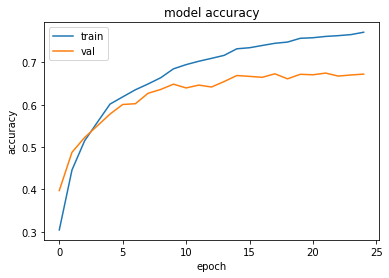

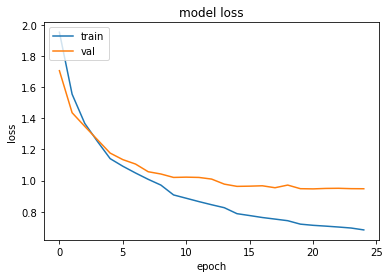

In [26]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

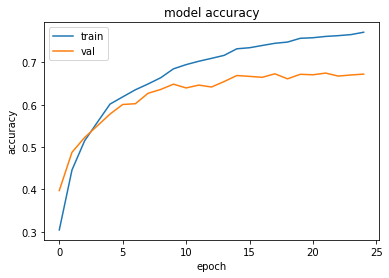

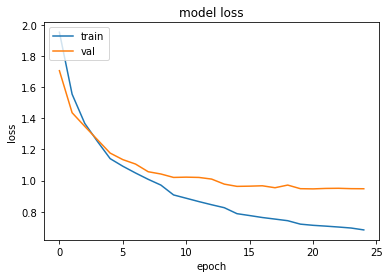

In [26]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
#e
from keras.optimizers import SGD, rmsprop
opt = rmsprop(lr=0.001, decay=1e-6)
batch_size = 75
epochs = 25
model2 = Sequential()
model2.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dense(10))
model2.add(Activation('softmax'))
model2.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])
history2 = model2.fit(x_train, y_train,epochs=epochs, validation_data=(x_val, y_val),shuffle=True)
model2.save_weights('modelo-p3-e.h5')

Train on 45500 samples, validate on 4500 samples
Epoch 1/25
45500/45500 [==============================] - 66s 1ms/step - loss: 1.3758 - acc: 0.5121 - val_loss: 1.0996 - val_acc: 0.6149
Epoch 2/25
45500/45500 [==============================] - 66s 1ms/step - loss: 0.9745 - acc: 0.6613 - val_loss: 1.0409 - val_acc: 0.6451
Epoch 3/25
45500/45500 [==============================] - 66s 1ms/step - loss: 0.8055 - acc: 0.7225 - val_loss: 0.8814 - val_acc: 0.6996
Epoch 4/25
45500/45500 [==============================] - 66s 1ms/step - loss: 0.6804 - acc: 0.7696 - val_loss: 0.9222 - val_acc: 0.6951
Epoch 5/25
45500/45500 [==============================] - 66s 1ms/step - loss: 0.5789 - acc: 0.8062 - val_loss: 0.9216 - val_acc: 0.7038
Epoch 6/25
45500/45500 [==============================] - 66s 1ms/step - loss: 0.4974 - acc: 0.8365 - val_loss: 1.0247 - val_acc: 0.7158
Epoch 7/25
45500/45500 [==============================] - 66s 1ms/step - loss: 0.4232 - acc: 0.8613 - val_loss: 1.1199 - val_acc:

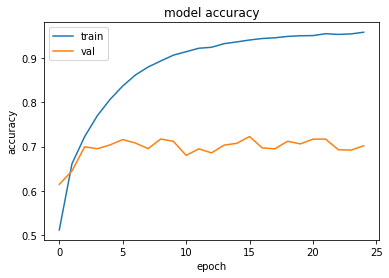

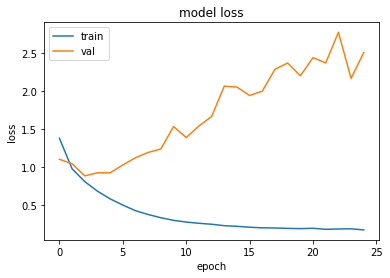

In [28]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Train on 45500 samples, validate on 4500 samples
Epoch 1/15
45500/45500 [==============================] - 74s 2ms/step - loss: 1.5824 - acc: 0.4583 - val_loss: 1.2885 - val_acc: 0.5471
Epoch 2/15
45500/45500 [==============================] - 74s 2ms/step - loss: 1.1615 - acc: 0.5909 - val_loss: 1.1788 - val_acc: 0.5796
Epoch 3/15
45500/45500 [==============================] - 74s 2ms/step - loss: 1.0033 - acc: 0.6493 - val_loss: 1.1133 - val_acc: 0.6044
Epoch 4/15
45500/45500 [==============================] - 74s 2ms/step - loss: 0.8806 - acc: 0.6923 - val_loss: 1.0698 - val_acc: 0.6273
Epoch 5/15
45500/45500 [==============================] - 74s 2ms/step - loss: 0.7689 - acc: 0.7316 - val_loss: 1.0243 - val_acc: 0.6453
Epoch 6/15
45500/45500 [==============================] - 74s 2ms/step - loss: 0.6626 - acc: 0.7698 - val_loss: 1.0667 - val_acc: 0.6367
Epoch 7/15
45500/45500 [==============================] - 74s 2ms/step - loss: 0.5648 - acc: 0.8039 - val_loss: 1.0201 - val_acc:

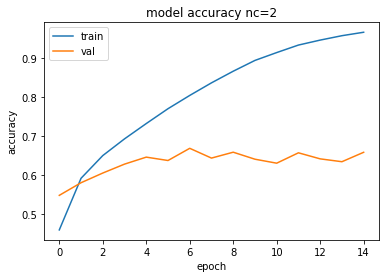

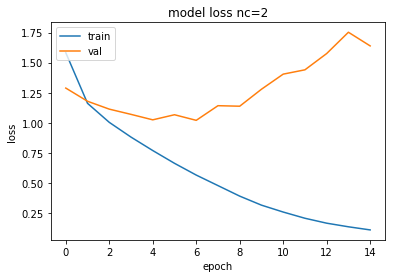

Train on 45500 samples, validate on 4500 samples
Epoch 1/15
45500/45500 [==============================] - 74s 2ms/step - loss: 1.5088 - acc: 0.4775 - val_loss: 1.2845 - val_acc: 0.5502
Epoch 2/15
45500/45500 [==============================] - 73s 2ms/step - loss: 1.1034 - acc: 0.6159 - val_loss: 1.0701 - val_acc: 0.6224
Epoch 3/15
45500/45500 [==============================] - 73s 2ms/step - loss: 0.9171 - acc: 0.6789 - val_loss: 0.9963 - val_acc: 0.6602
Epoch 4/15
45500/45500 [==============================] - 73s 2ms/step - loss: 0.7617 - acc: 0.7360 - val_loss: 1.0117 - val_acc: 0.6613
Epoch 5/15
45500/45500 [==============================] - 73s 2ms/step - loss: 0.6208 - acc: 0.7873 - val_loss: 1.2528 - val_acc: 0.6022
Epoch 6/15
45500/45500 [==============================] - 73s 2ms/step - loss: 0.4894 - acc: 0.8323 - val_loss: 1.1038 - val_acc: 0.6638
Epoch 7/15
45500/45500 [==============================] - 73s 2ms/step - loss: 0.3757 - acc: 0.8731 - val_loss: 1.1187 - val_acc:

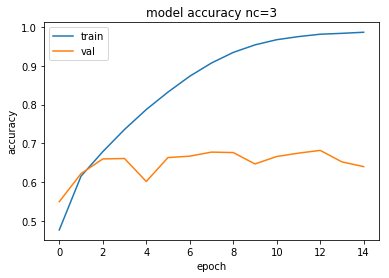

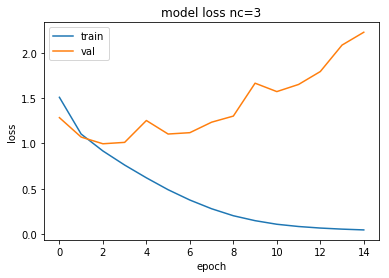

Train on 45500 samples, validate on 4500 samples
Epoch 1/15
45500/45500 [==============================] - 74s 2ms/step - loss: 1.5098 - acc: 0.4740 - val_loss: 1.2798 - val_acc: 0.5529
Epoch 2/15
45500/45500 [==============================] - 74s 2ms/step - loss: 1.0915 - acc: 0.6186 - val_loss: 1.0916 - val_acc: 0.6229
Epoch 3/15
45500/45500 [==============================] - 74s 2ms/step - loss: 0.9011 - acc: 0.6866 - val_loss: 0.9975 - val_acc: 0.6593
Epoch 4/15
45500/45500 [==============================] - 75s 2ms/step - loss: 0.7402 - acc: 0.7447 - val_loss: 0.9551 - val_acc: 0.6747
Epoch 5/15
45500/45500 [==============================] - 75s 2ms/step - loss: 0.5961 - acc: 0.7936 - val_loss: 0.9915 - val_acc: 0.6744
Epoch 6/15
45500/45500 [==============================] - 75s 2ms/step - loss: 0.4573 - acc: 0.8428 - val_loss: 1.1082 - val_acc: 0.6771
Epoch 7/15
45500/45500 [==============================] - 75s 2ms/step - loss: 0.3421 - acc: 0.8846 - val_loss: 1.1700 - val_acc:

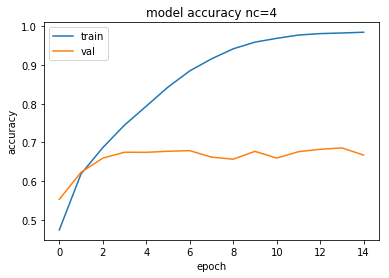

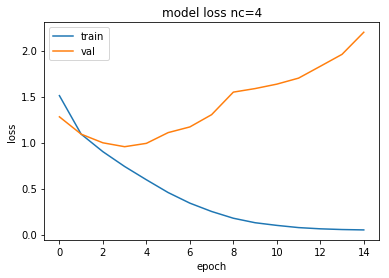

In [29]:
#f
import matplotlib.pyplot as plt
import numpy
%matplotlib inline
from keras.optimizers import SGD, rmsprop
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
import math
def step_decay(epoch):
    initial_lrate = 0.001
    lrate = initial_lrate * math.pow(0.5, math.floor((1+epoch)/5))
    lrate = max(lrate,0.00001)
    return lrate

batch_size = 75
epochs = 15
#Shallow network
ncs = [2,3,4]
for nc in ncs:
    opt = rmsprop()
    model = Sequential()
    model.add(Conv2D(64, (nc, nc), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])
    historyf = model.fit(x_train, y_train,epochs=epochs,batch_size=batch_size, validation_data=(x_val, y_val),shuffle=True)
    # summarize history for accuracy
    plt.plot(historyf.history['acc'])
    plt.plot(historyf.history['val_acc'])
    plt.title('model accuracy nc='+str(nc))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(historyf.history['loss'])
    plt.plot(historyf.history['val_loss'])
    plt.title('model loss nc='+str(nc))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [30]:
#g
"""Se ha sugerido que la práctica bastante habitual de continuar una capa
convolucional con una capa de pooling puede generar una reducción prematura 
de las dimensiones del patrón de entrada. Experimente con una arquitectura del tipo  C×C×P×C×C×P×F×F. 
Use 64 filtros para las primeras 2 capas convolucionales y 128 para las últimas dos. 
Reflexione sobre qué le parece más sensato: ¿mantener el tamaño de los filtros usados anteriormente? 
o ¿usar filtros más grandes en la segunda capa convolucional y más pequeños en la primera? o 
¿usar filtros más pequeños en la segunda capa convolucional y más grandes en la primera? 
Hint: con esta nueva arquitectura debiese superar el 70% de accuracy (de validación/test) antes de 5 epochs, 
    pero la arquitectura es más sensible a overfitting por lo que podrı́a ser conveniente agregar un regularizador. 
    Como resultado final de esta actividad gráficque los errores de entrenamiento, validación y pruebas como 
    función del número de “epochs”(fijando el máximo en un número razonable como T = 25).
"""
from keras.optimizers import SGD, rmsprop
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
import math
def step_decay(epoch):
    initial_lrate = 0.001
    lrate = initial_lrate * math.pow(0.5, math.floor((1+epoch)/5))
    lrate = max(lrate,0.00001)
    return lrate
opt = rmsprop()
batch_size = 75
epochs = 25

model4 = Sequential()
model4.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model4.add(Activation('relu'))
model4.add(Conv2D(64, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Conv2D(128, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(Conv2D(128, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dense(10))
model4.add(Activation('softmax'))
model4.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])

history4 = model4.fit(x_train, y_train,epochs=epochs,batch_size=batch_size, validation_data=(x_val, y_val),shuffle=True)
model4.save_weights('modelo-p3-g1.h5')



Train on 45500 samples, validate on 4500 samples
Epoch 1/25
45500/45500 [==============================] - 149s 3ms/step - loss: 1.6326 - acc: 0.4156 - val_loss: 1.1758 - val_acc: 0.5749
Epoch 2/25
 4050/45500 [=>............................] - ETA: 2:09 - loss: 1.1512 - acc: 0.5943

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
import math
def step_decay(epoch):
    initial_lrate = 0.001
    lrate = initial_lrate * math.pow(0.5, math.floor((1+epoch)/5))
    lrate = max(lrate,0.00001)
    return lrate
opt = rmsprop()
batch_size = 75
epochs = 25

model5 = Sequential()
model5.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model5.add(Activation('relu'))
model5.add(Conv2D(128, (3, 3), padding='same'))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))
model5.add(Conv2D(64, (3, 3), padding='same'))
model5.add(Activation('relu'))
model5.add(Conv2D(64, (3, 3), padding='same'))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))
model5.add(Flatten())
model5.add(Dense(512))
model5.add(Activation('relu'))
model5.add(Dense(10))
model5.add(Activation('softmax'))
model5.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])

history5 = model5.fit(x_train, y_train,epochs=epochs,batch_size=batch_size, validation_data=(x_val, y_val),shuffle=True)
model5.save_weights('modelo-p3-g2.h5')

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history5.history['acc'])
plt.plot(history5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [3]:
#h
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
import math
opt = rmsprop()
batch_size = 75
epochs = 25

model6 = Sequential()
model6.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model6.add(Activation('relu'))
model6.add(Conv2D(128, (3, 3), padding='same'))
model6.add(Activation('relu'))
model6.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
model6.add(Activation('relu'))
model6.add(Dropout(0.25))
model6.add(Conv2D(64, (3, 3), padding='same'))
model6.add(Activation('relu'))
model6.add(Conv2D(64, (3, 3), padding='same'))
model6.add(Activation('relu'))
model6.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
model6.add(Activation('relu'))
model6.add(Dropout(0.25))
model6.add(Flatten())
model6.add(Dense(512))
model6.add(Activation('relu'))
model6.add(Dense(10))
model6.add(Activation('softmax'))
model6.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])

history6 = model6.fit(x_train, y_train,epochs=epochs,batch_size=batch_size, validation_data=(x_val, y_val),shuffle=True)
model6.save_weights('modelo-p3-h.h5')

Train on 45500 samples, validate on 4500 samples
Epoch 1/25
45500/45500 [==============================] - 642s 14ms/step - loss: 1.9631 - acc: 0.2783 - val_loss: 1.7145 - val_acc: 0.3760
Epoch 2/25
45500/45500 [==============================] - 205s 4ms/step - loss: 1.6102 - acc: 0.4149 - val_loss: 1.6039 - val_acc: 0.4233
Epoch 3/25
45500/45500 [==============================] - 205s 4ms/step - loss: 1.4843 - acc: 0.4631 - val_loss: 1.5077 - val_acc: 0.4533
Epoch 4/25
45500/45500 [==============================] - 205s 4ms/step - loss: 1.4010 - acc: 0.4966 - val_loss: 1.4311 - val_acc: 0.4851
Epoch 5/25
45500/45500 [==============================] - 205s 4ms/step - loss: 1.3385 - acc: 0.5209 - val_loss: 1.4491 - val_acc: 0.4842
Epoch 6/25
45500/45500 [==============================] - 205s 4ms/step - loss: 1.2855 - acc: 0.5415 - val_loss: 1.3892 - val_acc: 0.5167
Epoch 7/25
45500/45500 [==============================] - 205s 4ms/step - loss: 1.2413 - acc: 0.5577 - val_loss: 1.3691 - 

In [48]:
model6.summary()

NameError: name 'model6' is not defined

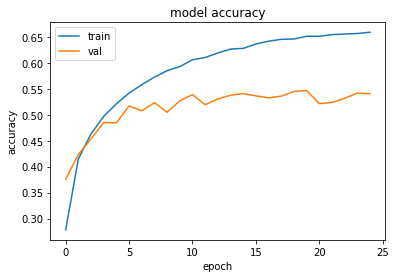

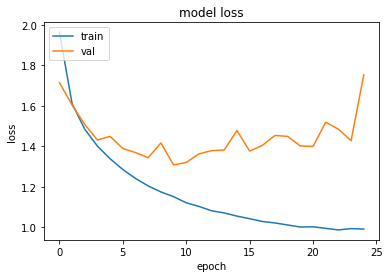

In [5]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history6.history['acc'])
plt.plot(history6.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
#i
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
import math
opt = rmsprop()
batch_size = 75
epochs = 25

datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=0, # randomly rotate images (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of height)
    horizontal_flip=True, # randomly flip images
    vertical_flip=False) # randomly flip images
datagen.fit(x_train)

#model2.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])
historyi = model2.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0]// batch_size, epochs=epochs,
                    validation_data=(x_val, y_val))


Epoch 1/25
606/606 [==============================] - 45s 74ms/step - loss: 1.9913 - acc: 0.2902 - val_loss: 1.7388 - val_acc: 0.3967
Epoch 2/25
606/606 [==============================] - 45s 74ms/step - loss: 1.8230 - acc: 0.3453 - val_loss: 1.7088 - val_acc: 0.4047
Epoch 3/25
606/606 [==============================] - 45s 74ms/step - loss: 1.7594 - acc: 0.3679 - val_loss: 1.6319 - val_acc: 0.4200
Epoch 4/25
606/606 [==============================] - 45s 74ms/step - loss: 1.7273 - acc: 0.3828 - val_loss: 1.6182 - val_acc: 0.4304
Epoch 5/25
606/606 [==============================] - 45s 74ms/step - loss: 1.7058 - acc: 0.3871 - val_loss: 1.6170 - val_acc: 0.4436
Epoch 6/25
606/606 [==============================] - 45s 74ms/step - loss: 1.6803 - acc: 0.3971 - val_loss: 1.6094 - val_acc: 0.4398
Epoch 7/25
606/606 [==============================] - 45s 74ms/step - loss: 1.6635 - acc: 0.4026 - val_loss: 1.5740 - val_acc: 0.4507
Epoch 8/25
606/606 [==============================] - 45s 74ms

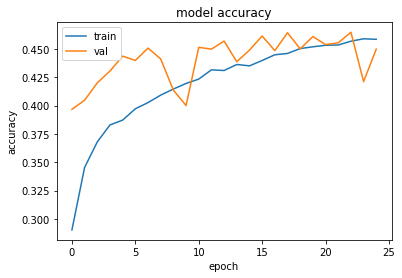

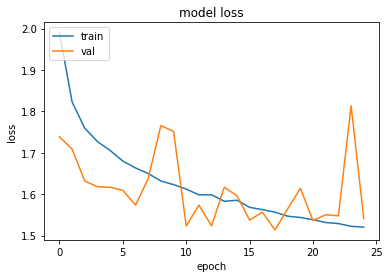

In [11]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(historyi.history['acc'])
plt.plot(historyi.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyi.history['loss'])
plt.plot(historyi.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [6]:
#j
#Aqui es mas que nada desarrollo utilizando los codigos de arriba
opt = rmsprop()
epoch=15
batch_size=75
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])
historyj = model.fit(x_train, y_train,epochs=epochs,batch_size=batch_size, validation_data=(x_val, y_val),shuffle=True)
model.save_weights('modelo-p3-j.h5')

Train on 45500 samples, validate on 4500 samples
Epoch 1/15
45500/45500 [==============================] - 74s 2ms/step - loss: 1.7958 - acc: 0.3932 - val_loss: 1.6316 - val_acc: 0.4060
Epoch 2/15
45500/45500 [==============================] - 74s 2ms/step - loss: 1.4232 - acc: 0.4970 - val_loss: 1.4334 - val_acc: 0.4916
Epoch 3/15
45500/45500 [==============================] - 74s 2ms/step - loss: 1.2610 - acc: 0.5577 - val_loss: 1.5393 - val_acc: 0.4633
Epoch 4/15
45500/45500 [==============================] - 74s 2ms/step - loss: 1.1127 - acc: 0.6111 - val_loss: 1.5545 - val_acc: 0.4682
Epoch 5/15
45500/45500 [==============================] - 74s 2ms/step - loss: 0.9668 - acc: 0.6640 - val_loss: 1.4243 - val_acc: 0.5153
Epoch 6/15
45500/45500 [==============================] - 74s 2ms/step - loss: 0.8159 - acc: 0.7185 - val_loss: 1.5332 - val_acc: 0.5093
Epoch 7/15
45500/45500 [==============================] - 74s 2ms/step - loss: 0.6742 - acc: 0.7671 - val_loss: 1.6427 - val_acc:

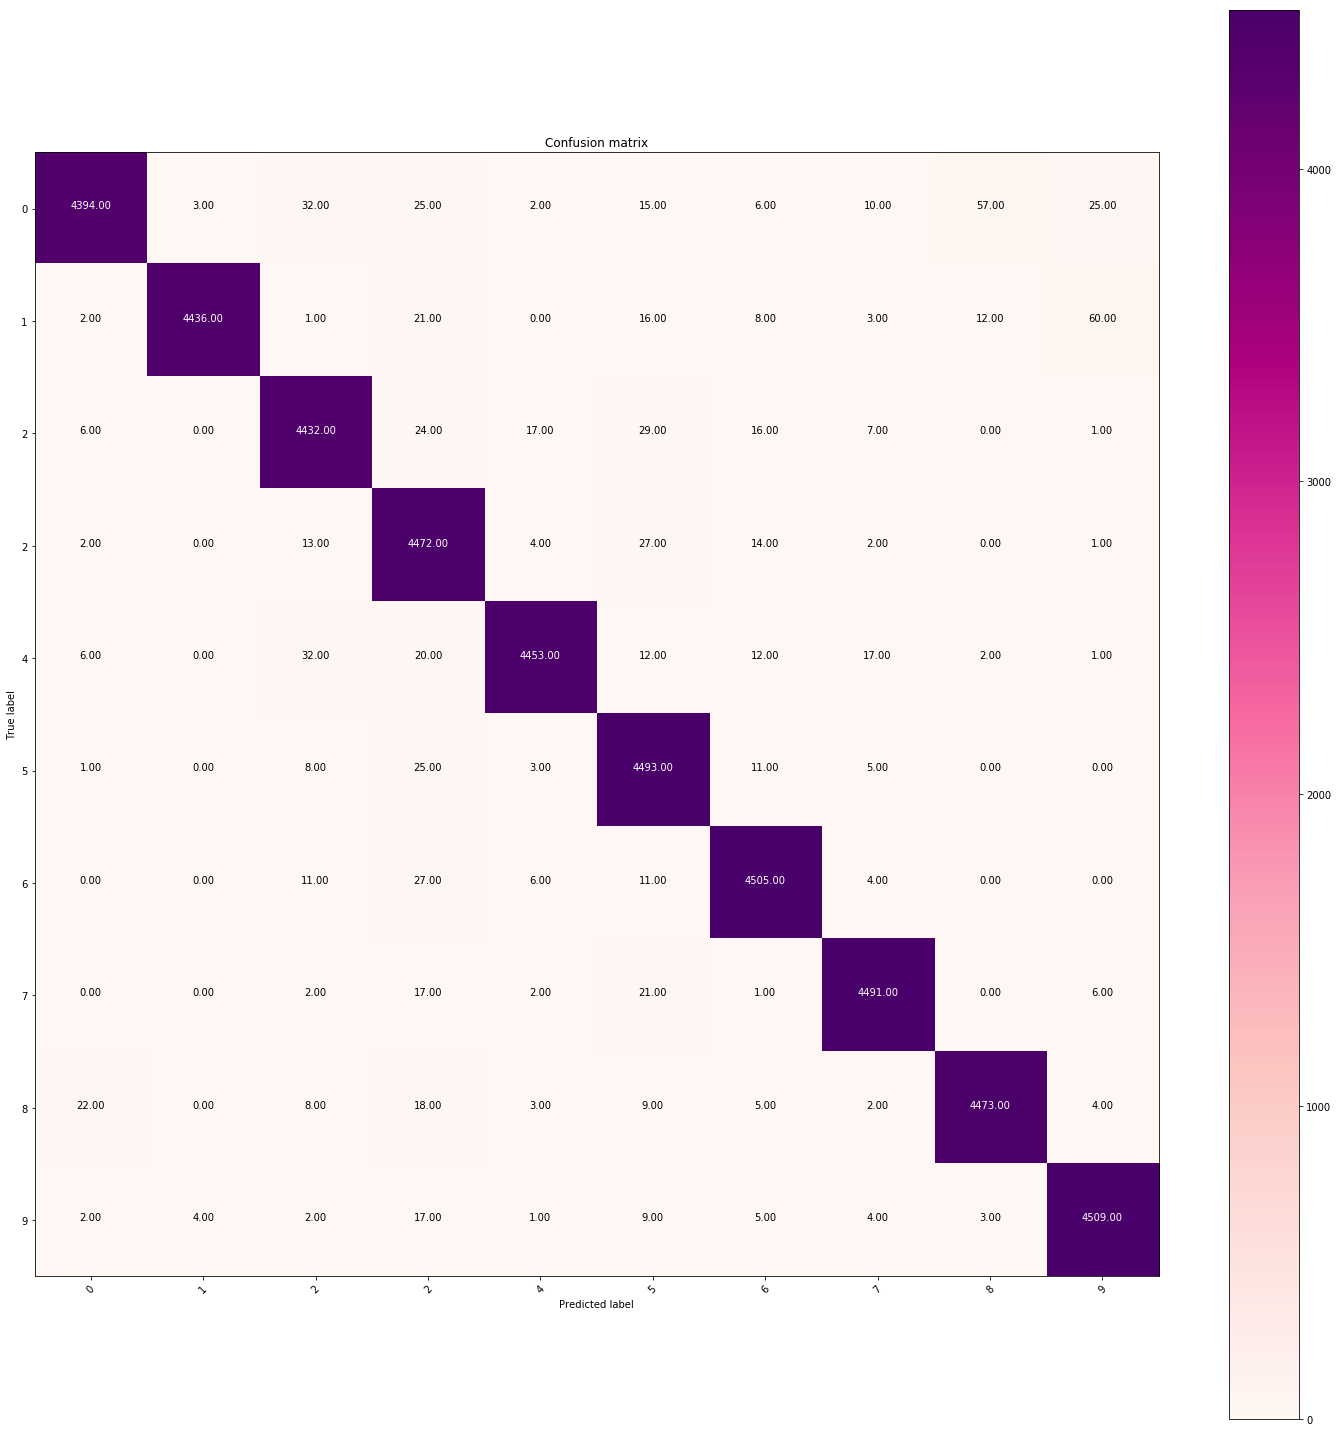

In [15]:

#codigo para matrices de confusion
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
y_pred = model.predict(x_train, batch_size=None, verbose=0, steps=None)
"""
for i in range(len(y_pred)):
    vector= np.zeros(10)
    argm=np.argmax(y_pred[i])
    vector[argm]=1
    cosa.append(vector)
np.vstack((y_train,y_pred)).T
print(cosa[0])

"""
Y=[]
Y_gorro=[]
for i in range(len(y_pred)):
    Y.append(np.argmax(y_train[i]))
    Y_gorro.append(np.argmax(y_pred[i]))
cm=confusion_matrix(Y, Y_gorro)
title='Confusion matrix'
cmap=plt.cm.RdPu
#classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
classes=[0,1,2,2,4,5,6,7,8,9]
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f' if True else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

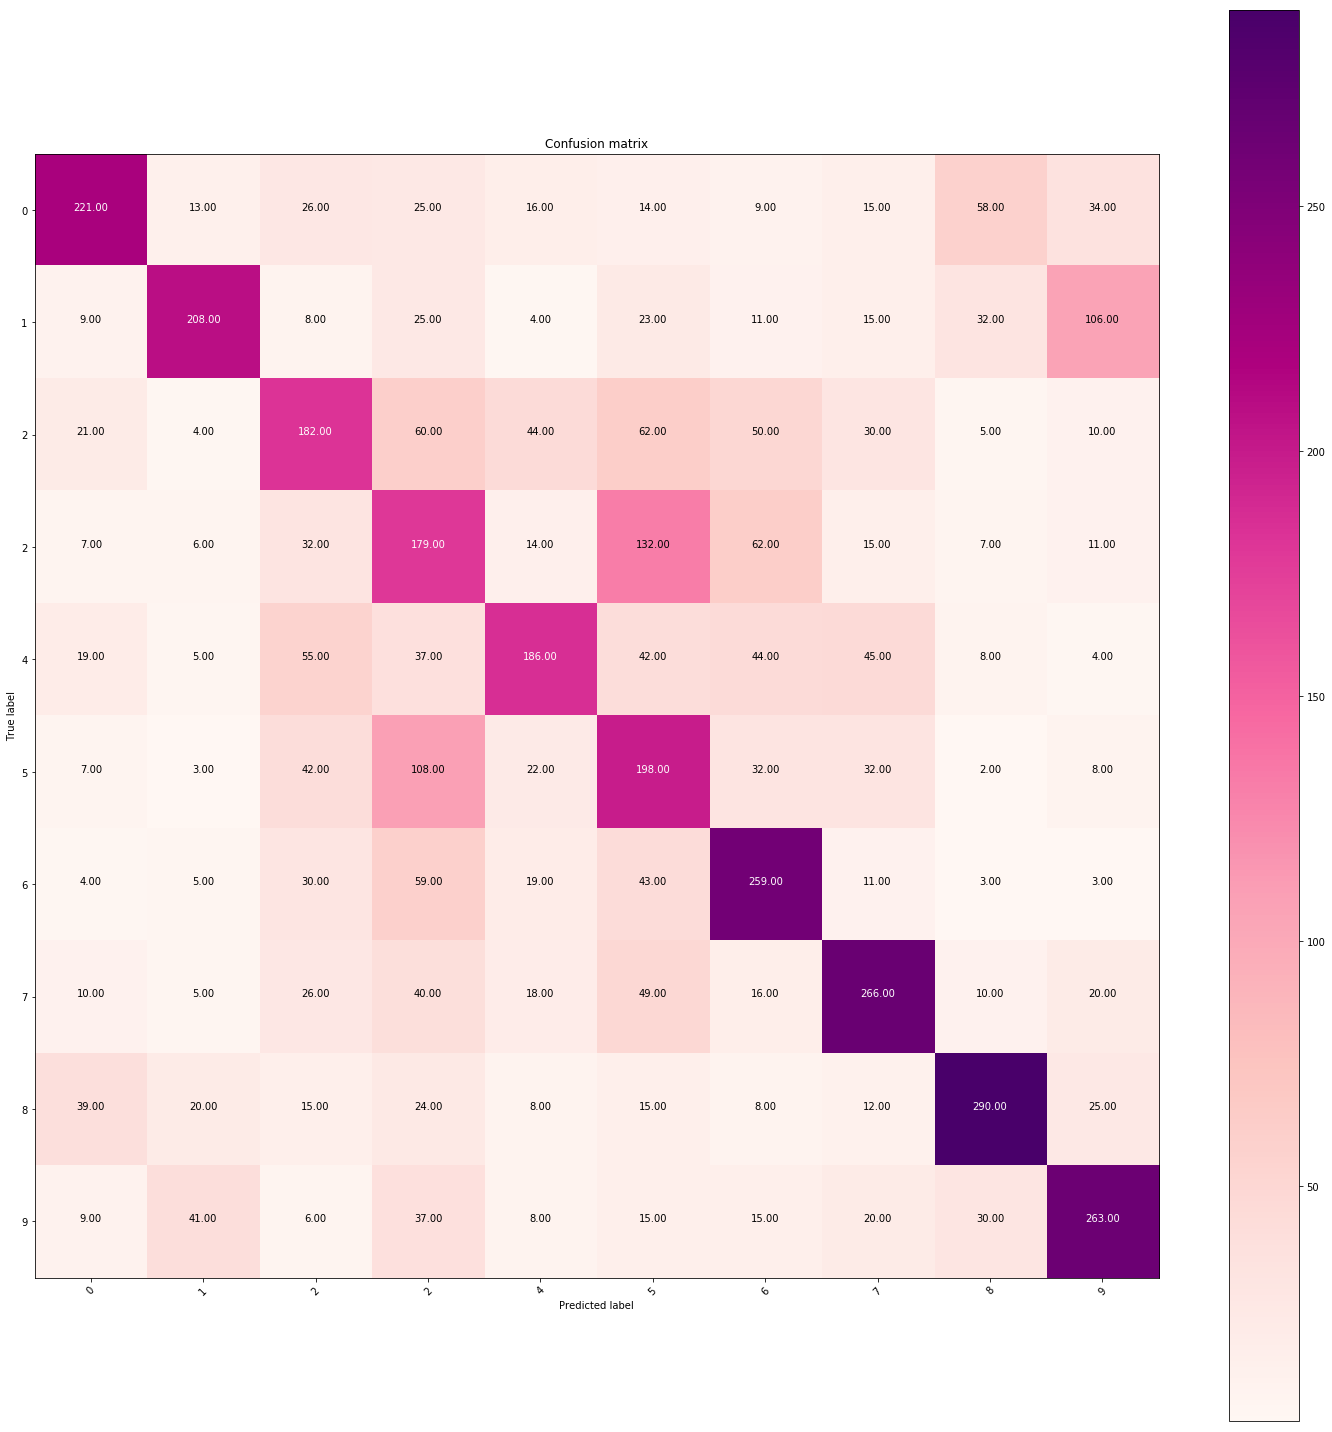

In [16]:

#codigo para matrices de confusion
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
y_pred = model.predict(x_val, batch_size=None, verbose=0, steps=None)


"""
for i in range(len(y_pred)):
    vector= np.zeros(10)
    argm=np.argmax(y_pred[i])
    vector[argm]=1
    cosa.append(vector)
np.vstack((y_train,y_pred)).T
print(cosa[0])

"""
Y=[]
Y_gorro=[]
for i in range(len(y_pred)):
    Y.append(np.argmax(y_val[i]))
    Y_gorro.append(np.argmax(y_pred[i]))
cm=confusion_matrix(Y, Y_gorro)
title='Confusion matrix'
cmap=plt.cm.RdPu
#classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
classes=[0,1,2,2,4,5,6,7,8,9]
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f' if True else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

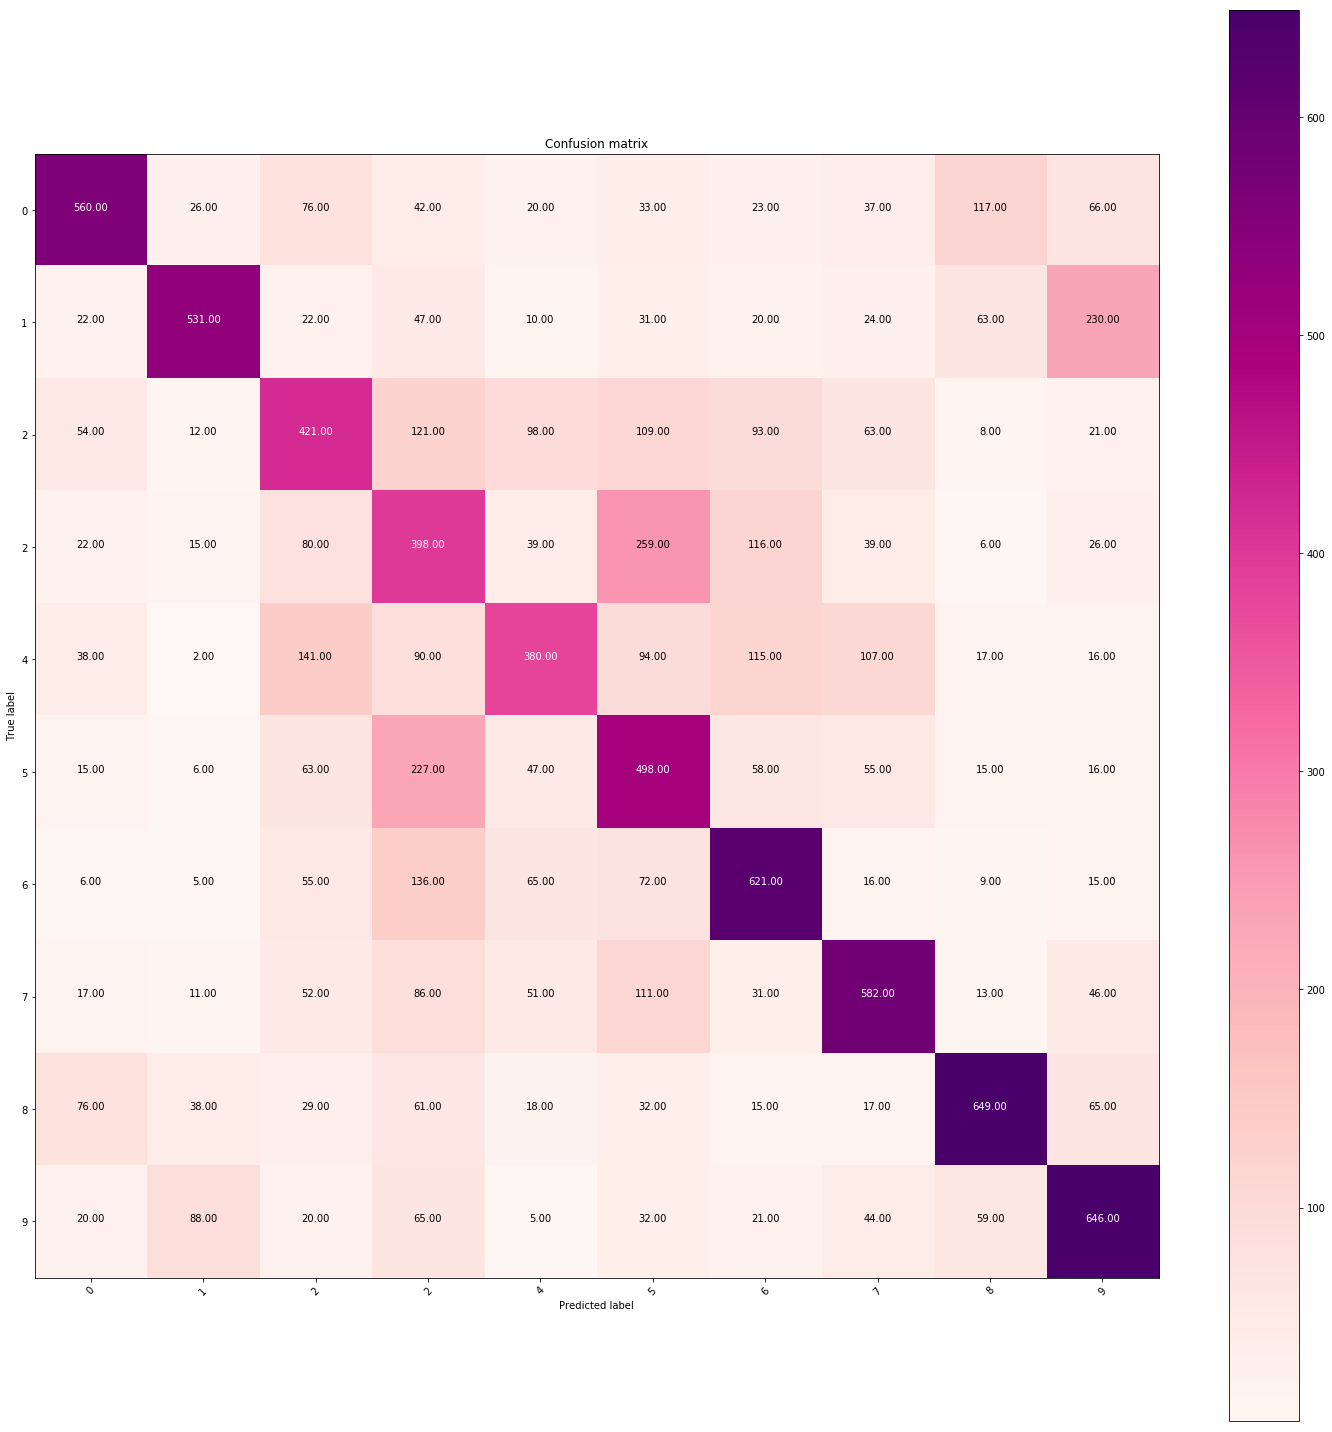

In [17]:

#codigo para matrices de confusion
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
y_pred = model.predict(x_test, batch_size=None, verbose=0, steps=None)

"""
for i in range(len(y_pred)):
    vector= np.zeros(10)
    argm=np.argmax(y_pred[i])
    vector[argm]=1
    cosa.append(vector)
np.vstack((y_train,y_pred)).T
print(cosa[0])

"""
Y=[]
Y_gorro=[]
for i in range(len(y_pred)):
    Y.append(np.argmax(y_test[i]))
    Y_gorro.append(np.argmax(y_pred[i]))
cm=confusion_matrix(Y, Y_gorro)
title='Confusion matrix'
cmap=plt.cm.RdPu
#classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
classes=[0,1,2,2,4,5,6,7,8,9]
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f' if True else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#k
#hacer lo de la pregunta 2, pero con las redes de convolución

<a id="cuarto"></a>
## 4. Aplicación de una red neuronal en Localización
Desde la edad antigua, múltiples formas de localización han sido desarrolladas. Dentro de los avances más importantes en este ámbito, es el desarrollo de la teorı́a cientı́fica y técnica denominada georreferenciación. Gracias a GPS, el crecimiento y acceso de la georreferenciación y navegación está en progresivo aumento, el problema surge cuando se intentan estimar en recintos interiores (como edificios o bajo tierra) donde el GPS no funciona de la manera como uno esperaría, debido a que existen muchos obstáculos e interferencia que imposibilitan su uso.  
Dentro de interiores se cuenta con señales RSSI (*fingerprint*) que pueden atacar este problema, sin embargo los métodos actuales no son robustos a ruido, por lo que su tarea será la de abordar este problema para mejorar exactitud de sistemas de posicionamiento en interiores mediante redes neuronales.  

La metodología con la que se trabajará será que, para dentro de interiores, dispositivos *Bluetooth* emiten señales RSSI las cuales son captadas por el dispositivo "objetivo" al cual se le desea determinar su localización, recibiendo distintas intensidades de señal de cada dispositivo emisor debido a su posición en el interior. Los datos con los que se va a trabajar (*IndoorFingerprint.csv*) fueron provistos por el nuevo Ing. Civil Informático Felipe Berrios, éstos constan de 8 características (*C1hA,0kxZ,tvMX,OlYb,7rk5,F39L,VNSF,tkxI*) correspondientes a las mediciones hechas/recibidas por el dispositivo "objetivo" de las distintas señales RSSI emitidas por los dispositivos *Bluetooth* en los bordes del interior, además de tener la posición del dispositivo "objetivo" en un plano XY (valor a estimar).

<img src="https://i.imgur.com/Xheipaa.png" width="60%" height="20%" />

Grilla ejemplo de cómo funciona el sistema (elaboración por Felipe Berrios). Los 4 dispositivos en la esquina son los que emiten las señales RSSI, el punto naranja es el dispositivo que las recibe y es el "objetivo" a determinar la posición.

Una consideración importante es el cómo tratar la ausencia de la señal proveniente de un dispositivo *Bluetooth*, para estos datos se utiliza un valor de +100, ya que es imposible obtener este valor debido a las características de la escala RSSI (siempre negativa o igual a cero), pero puede ser sustituido por otro.  
Para hacer el trabajo mas simple se discretizará la posición en el plano definiendo zonas en dónde está el objeto a localizar. Las zonas deben ser las que indica la malla a continuación:

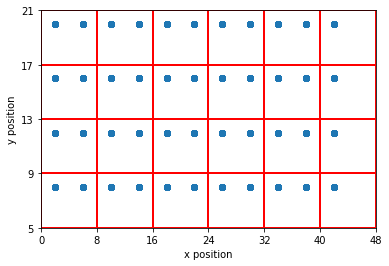

In [25]:
import pandas as pd
df = pd.read_csv("./IndoorFingerprint.csv")

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df["X"],df["Y"])

x_ticks = np.arange(0, 49, 8)
y_ticks = np.arange(5, 22, 4)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid(color='r', linestyle='-', linewidth=2)
plt.ylabel("y position")
plt.xlabel("x position")
plt.show()

Donde los puntos azules son los distintos datos superpuestos de las posiciones del objeto a localizar. Por ejemplo el punto (2,8) está en la primera zona (o en la primera zona del eje *x* y del eje *y*), el punto (2,20) está en la zona 19 (o en la primera zona del eje *x* y la cuarta zona del eje *y*). Esta discretización transforma el problema que en un principio podría ser de regresión para determinar la posición exacta, en un problema de clasificación dividiendo (dentro de los posibles valores) 6 zonas para el eje "*x*" y 4 zonas para el eje "*y*", contando con un total de 24 clases (24 zonas en la malla).

> Deberá entrenar una red neuronal *feed forward* para la clasificación de las 24 posibles clases, con el objetivo de tener un desempeño (*accuracy*) mayor al 75%.
#### Importante
El conjunto de pruebas está **fijado** a través de los indices de posiciones del dataset, por lo que deberá leer estos indices y crear el conjunto de pruebas a partir de éstos.
```python
mask_test = np.loadtxt('mask_test.csv',dtype="i")
X_test = X[mask_test]
X_train = np.delete(X,mask_test,axis=0)
```
<div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con los modelos</div>

In [47]:
import numpy as np
from sklearn.preprocessing import StandardScaler
mask_test = np.loadtxt('mask_test.csv',dtype="i")
#print(mask_test)

X = df['X'].values
print(X.shape)
#scaler = StandardScaler().fit(X)
#X_scaled = pd.DataFrame(scaler.transform(X),columns=X.columns)
#x_test = X_scaled[mask_test]
Y = df['Y'].values
y_test=Y[mask_test]
x_test = X[mask_test]
print(x_test.shape)
print(X.shape)
#print(y_test)


#x_test.head()
x_train = np.delete(X,mask_test,axis=0)

#scaler = StandardScaler().fit(df_train)
#X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
#y_train = df_train.pop('MEDV').reshape(-1,1)

(6600,)
(1980,)
(6600,)


ValueError: Wrong number of items passed 4620, placement implies 6600

<a id="refs"></a>
## Referencias
[1] Glorot, X., & Bengio, Y. (2010, March). *Understanding the difficulty of training deep feedforward neural networks*. In Proceedings of the thirteenth international conference on artificial intelligence and statistics (pp. 249-256).    
[2]  He, K., Zhang, X., Ren, S., & Sun, J. (2015). *Delving deep into rectifiers: Surpassing human-level performance on imagenet classification*. In Proceedings of the IEEE international conference on computer vision (pp. 1026-1034).  
[3] Krizhevsky, A., & Hinton, G. (2009). Learning multiple layers of features from tiny images.